# Binary Classification: Telcom company Customer Churn Classification
## Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

## Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

## Dataset Attributes
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

# Load dataset

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('train_problem1_UAI.csv')
tel_com_test=pd.read_csv('test_problem1_UAI.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9313-QOLTZ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.3,No
1,6654-QGBZZ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
2,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
3,8020-BWHYL,Female,1,No,No,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45,Yes
4,3594-IVHJZ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,42.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
6334,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
6335,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
6336,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [4]:
tel_com_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
1,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
2,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
3,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
4,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4568-KNYWR,Male,0,No,No,52,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),63.25,3342.45
701,9658-WYUFB,Female,0,No,No,17,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.40,1617.50
702,0997-YTLNY,Female,0,No,Yes,19,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,48.80,953.65
703,3208-YPIOE,Male,0,No,No,39,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,3017.65


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [6]:
# How much data is present? 
df.shape

(6338, 21)

In [7]:
# What attributes/features are continuous valued?
continuous_attributes = df.select_dtypes(include=['number']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Print the result
print("Continuous attributes:", continuous_attributes)
print("Categorical attributes:", categorical_attributes)

Continuous attributes: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical attributes: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [8]:
# Display the statistical values for each of the attributes, of the distributions for each attribute. 
statistical_values = df.describe()
statistical_values

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.161723,32.358630,64.693760
std,0.368226,24.537141,30.140955
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# checking for null values across all columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [12]:
df.shape

(6338, 21)

### Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [6]:
# Replace missing values of TotalCharges with the mean of non-missing values and converting it into a continous variable 
total_charges_mean = df['TotalCharges'].replace(' ', np.nan).dropna().astype(float).mean()
df['TotalCharges'] = df['TotalCharges'].replace(' ', total_charges_mean).astype(float)
# # Check if 'TotalCharges' column is numeric
# numeric_mask = pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()


In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9313-QOLTZ,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,518.30,No
1,6654-QGBZZ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.90,No
2,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
3,8020-BWHYL,Female,1,No,No,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45,Yes
4,3594-IVHJZ,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,42.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
6334,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
6335,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
6336,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


### Next, let's create visualizations to explore the data

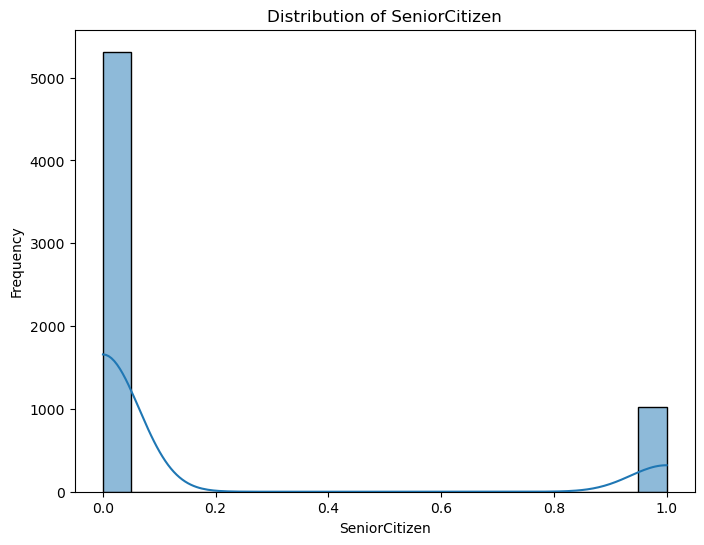

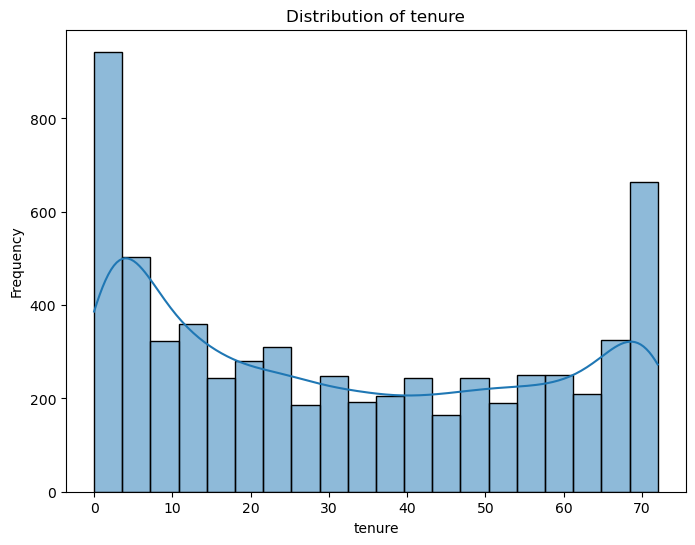

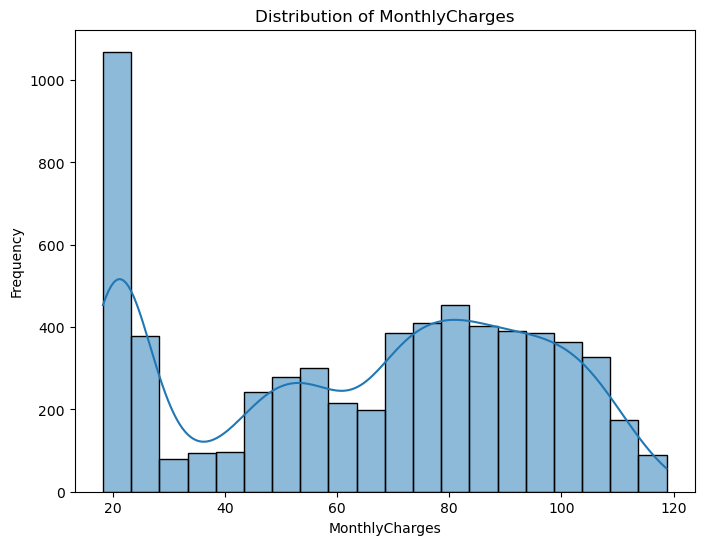

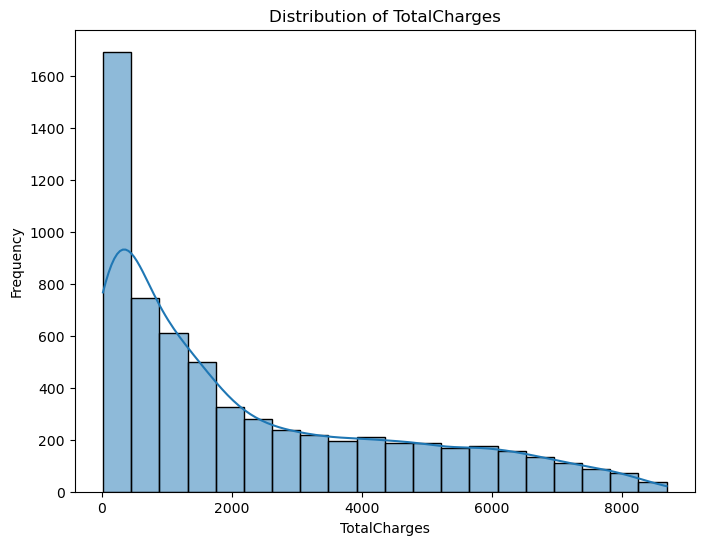

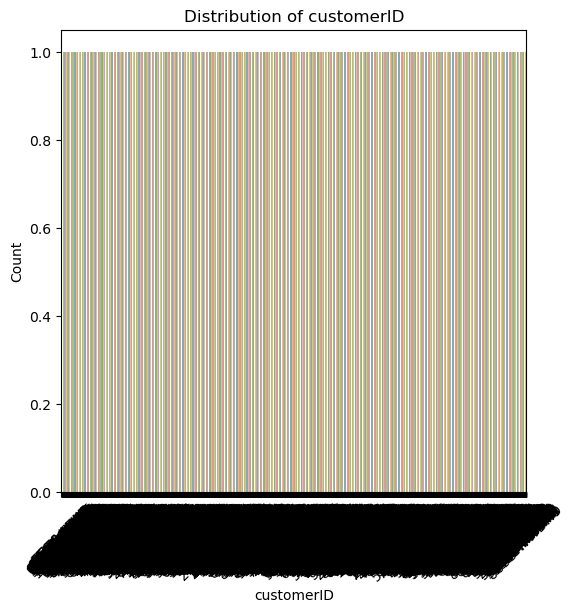

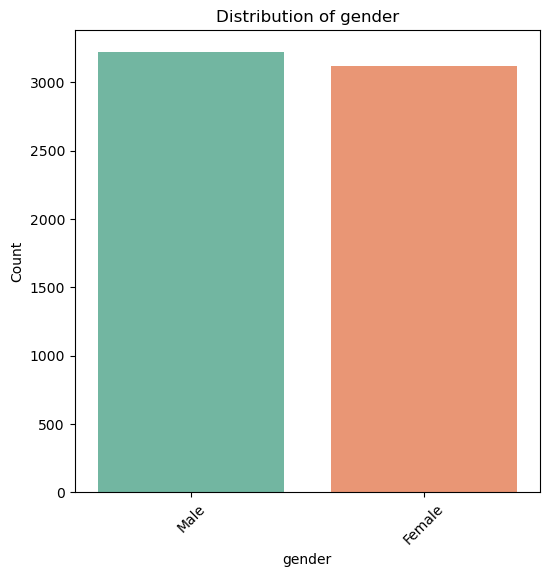

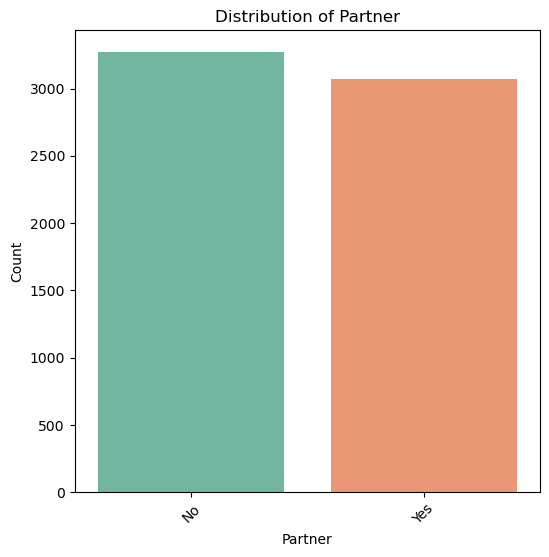

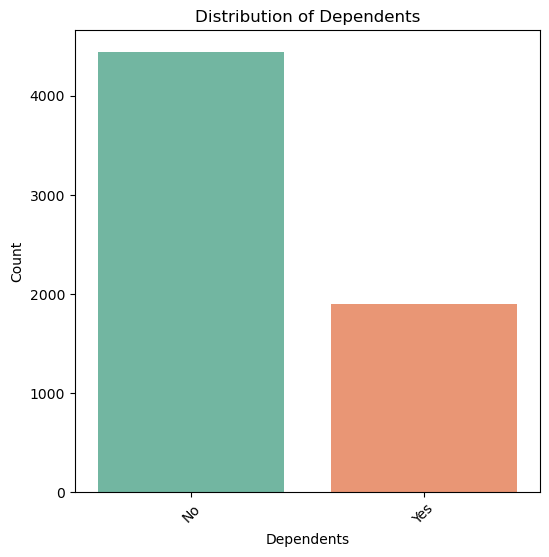

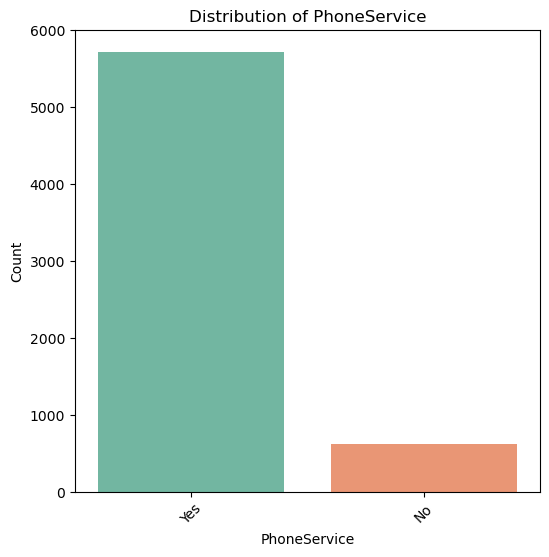

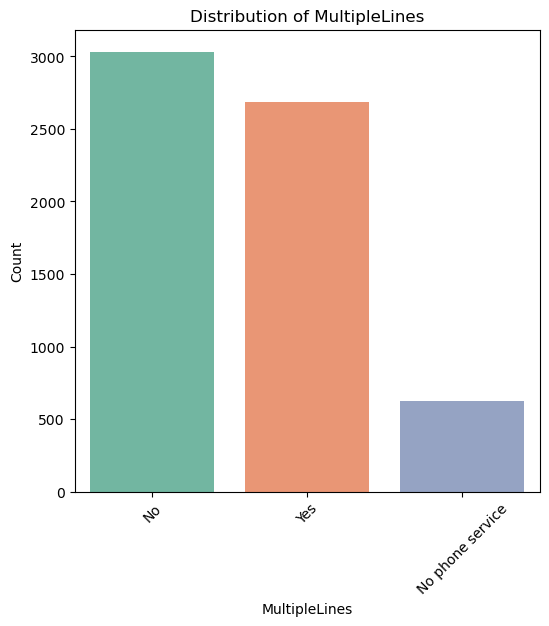

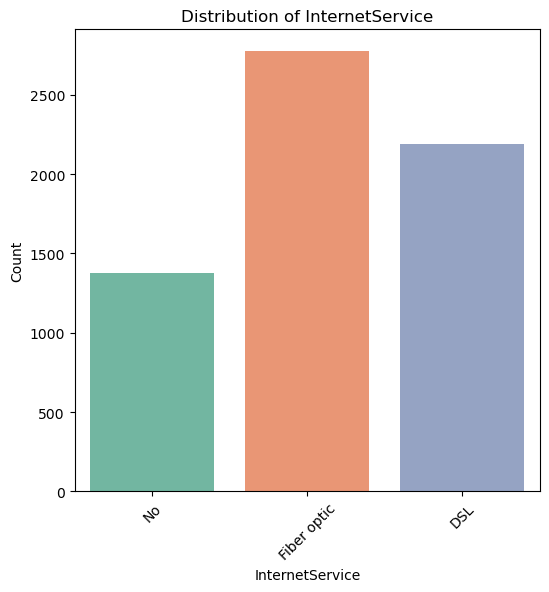

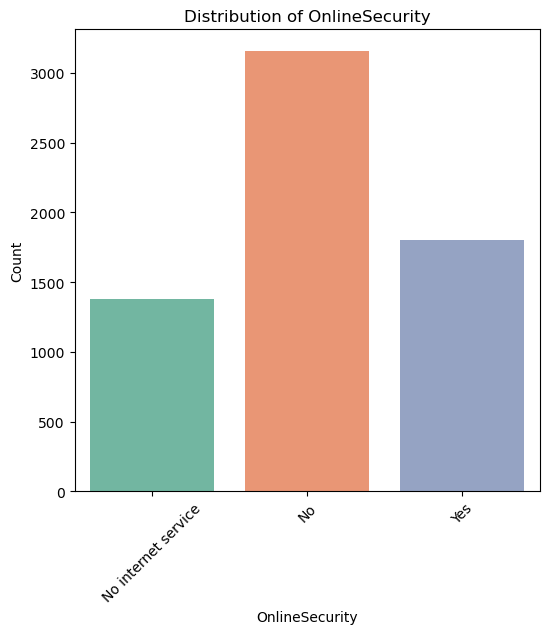

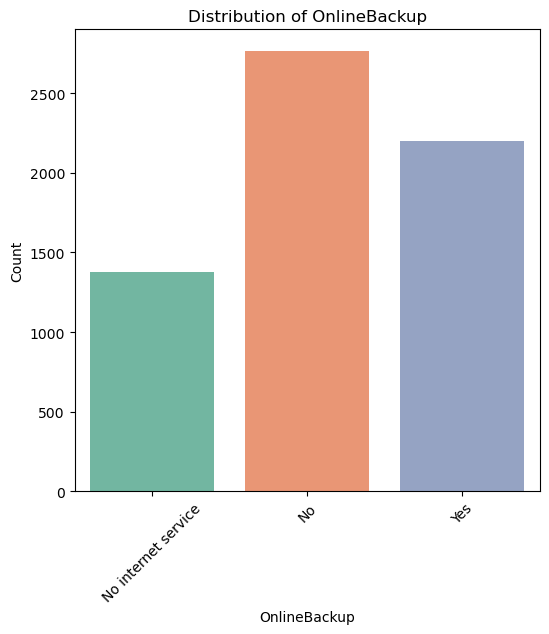

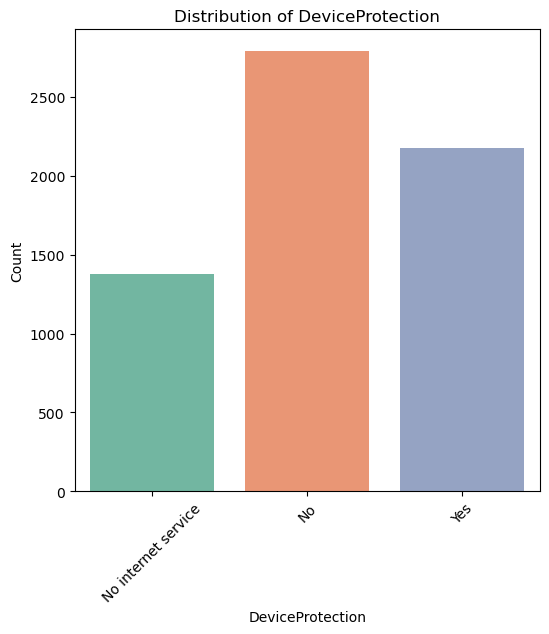

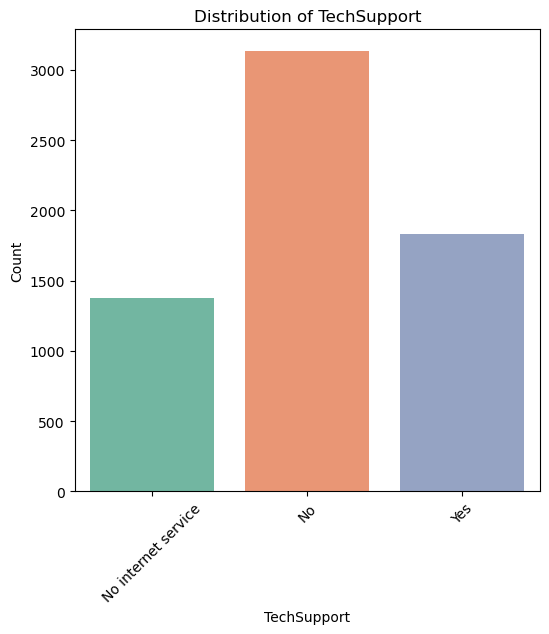

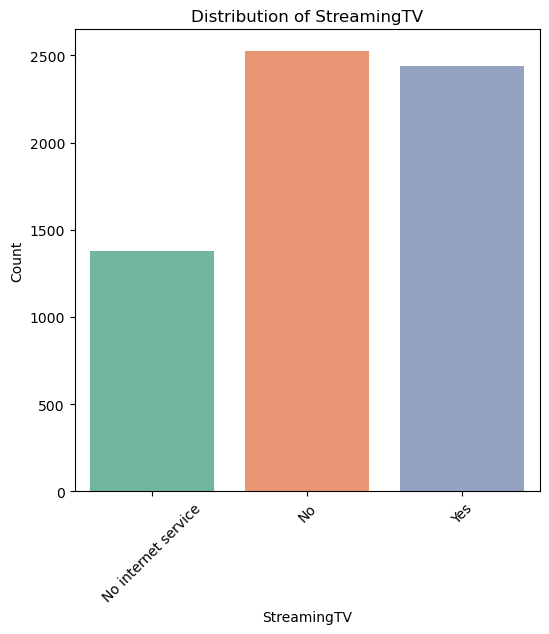

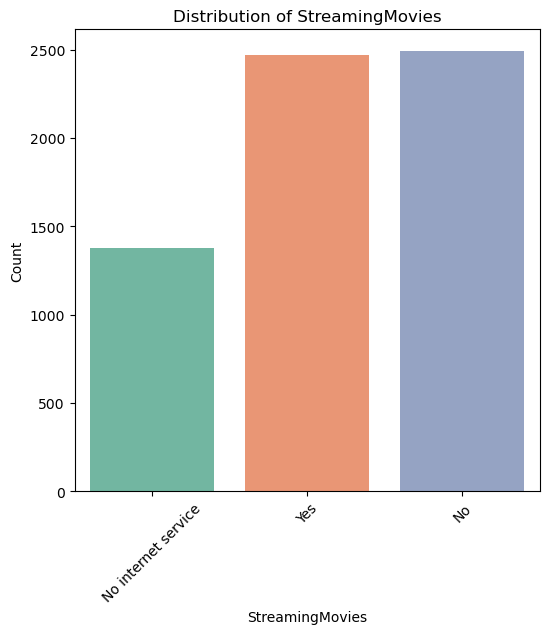

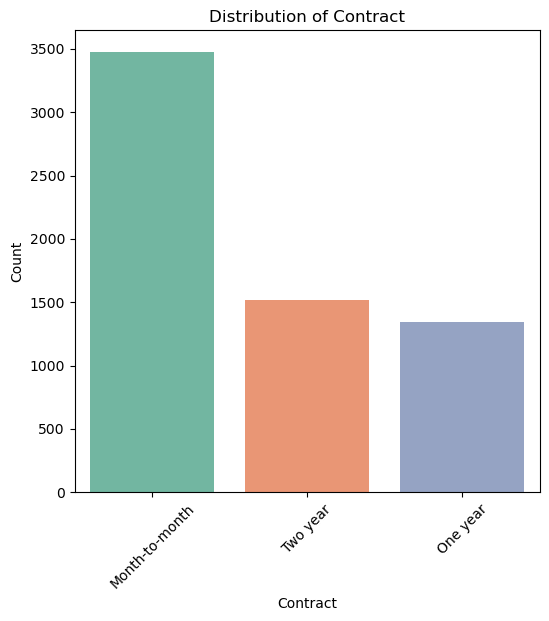

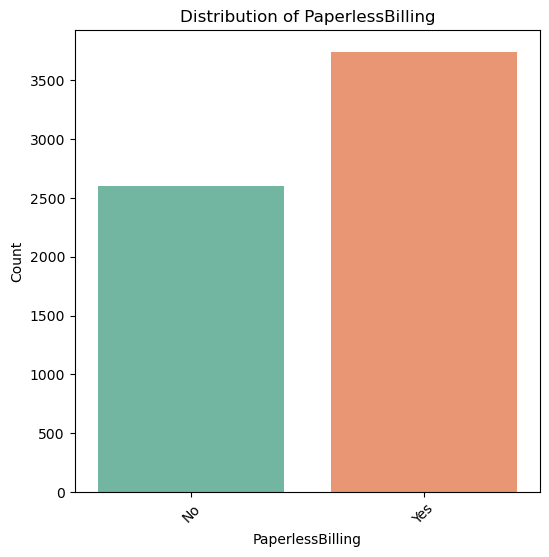

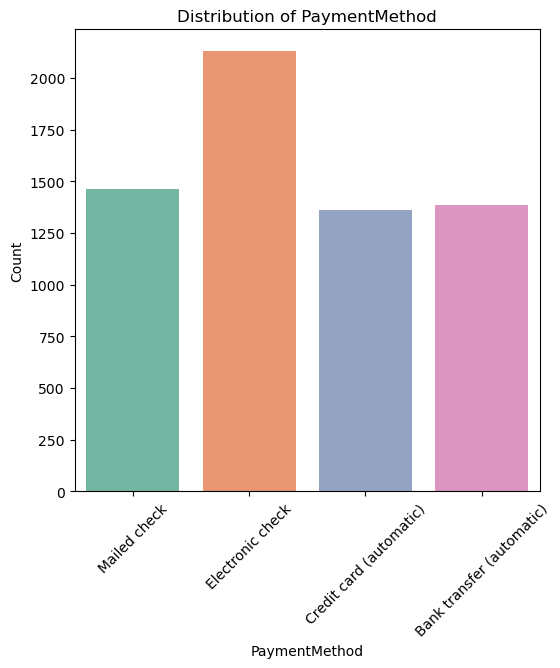

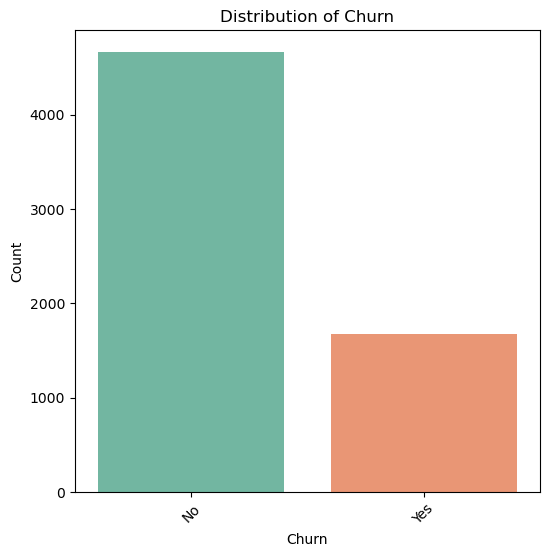

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_attribute_distribution(df):
    # Histograms for numerical attributes
    num_attributes = df.select_dtypes(include=['number']).columns
    for col in num_attributes:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Countplots for categorical attributes
    cat_attributes = df.select_dtypes(include=['object']).columns
    for col in cat_attributes:
        plt.figure(figsize=(6, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
visualize_attribute_distribution(df)


### Distribution of each feature with the target

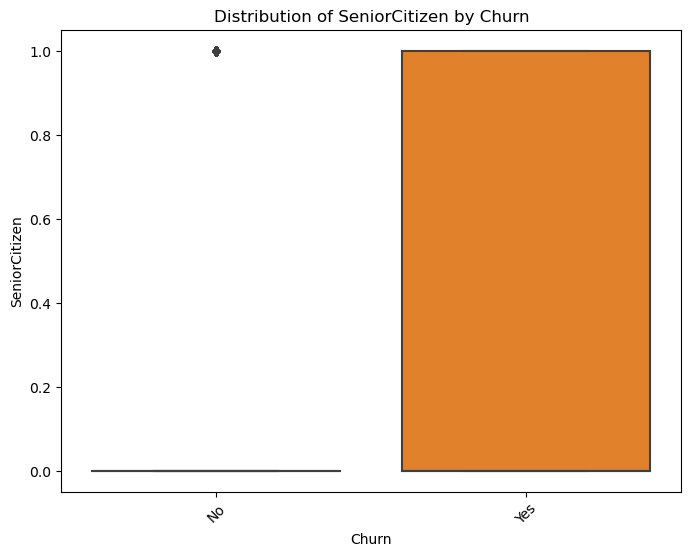

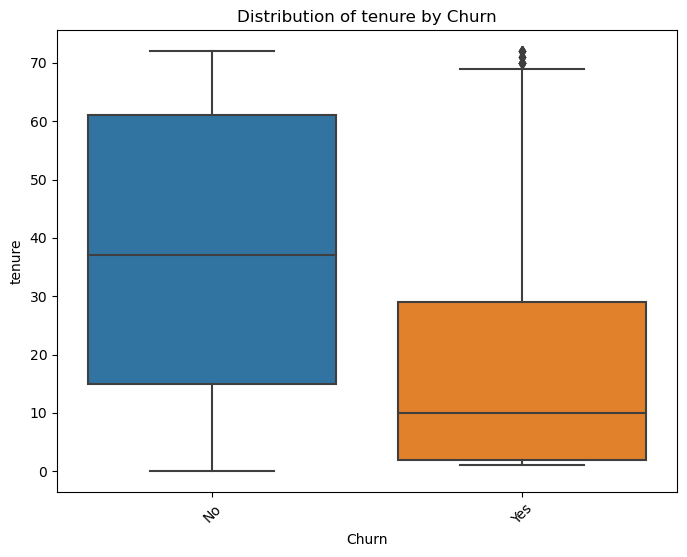

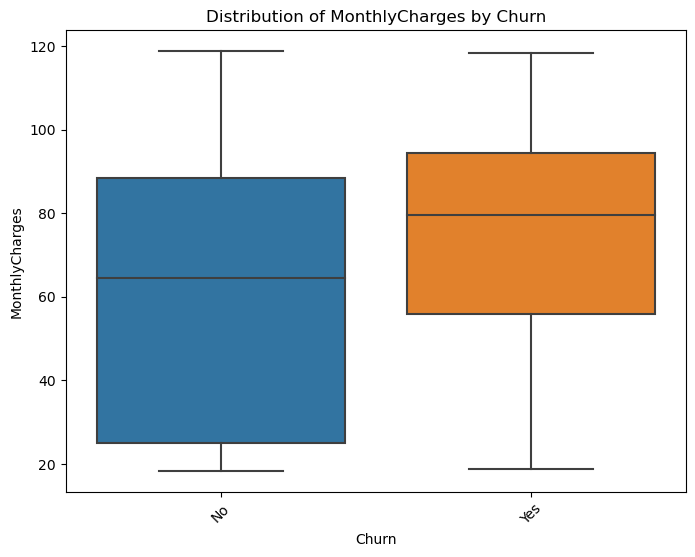

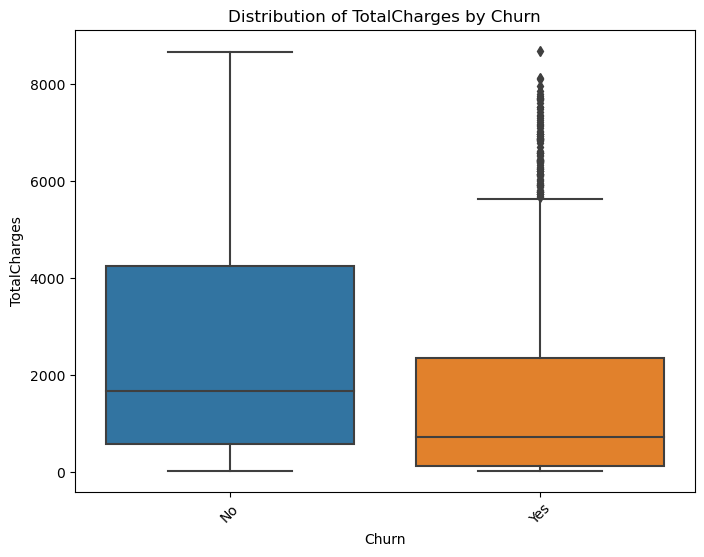

In [8]:
# distribution of each feature with the target
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data_label_relationship(df, label_column):
    num_attributes = df.select_dtypes(include=['number']).columns
    
    if df[label_column].dtype == 'object':
        # If label column is categorical
        for col in num_attributes:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[label_column], y=df[col])
            plt.title(f'Distribution of {col} by {label_column}')
            plt.xlabel(label_column)
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.show()
            
    else:
        # If label column is numerical
        for col in num_attributes:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[col], y=df[label_column])
            plt.title(f'{col} vs {label_column}')
            plt.xlabel(col)
            plt.ylabel(label_column)
            plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'label_column' is the name of the label column
visualize_data_label_relationship(df, 'Churn')


### Encoding for categorical columns:

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5900,1,0,0,0,26,1,0,2,1,...,1,1,1,1,0,0,3,20.90,518.30,0
1,4246,0,0,0,0,1,1,0,2,1,...,1,1,1,1,0,0,3,19.90,19.90,0
2,4387,1,1,1,0,18,1,0,1,0,...,0,0,0,2,0,0,2,78.55,1422.65,1
3,5102,0,1,0,0,15,1,0,1,0,...,0,0,0,0,0,1,1,75.30,1147.45,1
4,2265,0,0,0,0,2,1,0,2,1,...,1,1,1,1,0,1,3,20.45,42.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,428,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,95.00,1
6334,3800,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,2198.30,0
6335,5119,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,306.05,0
6336,4739,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,1200.15,1


## Question 2 : Data Pre-processing & Feature Engineering (20 pt)
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.

Perform Feature Engineering on the dataset.

**Hint** : Perform few statistical tests (Eg: ANOVA) on the dataset and Data Scaling, Sampling as needed. Based on that, check which columns can be eliminated.

**Hint** : Check for any null values in the dataset and perform necessary actions. Also, encoding categorical columns necessarily.

### Dropping the column customerID

In [18]:
df = df.drop(columns=['customerID'])

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,26,1,0,2,1,1,1,1,1,1,0,0,3,20.90,518.30,0
1,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.90,19.90,0
2,1,1,1,0,18,1,0,1,0,0,0,0,0,2,0,0,2,78.55,1422.65,1
3,0,1,0,0,15,1,0,1,0,2,0,0,0,0,0,1,1,75.30,1147.45,1
4,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,1,3,20.45,42.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
6334,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
6335,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
6336,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


### Checking if the data is imbalance or not

In [20]:
# checking if the data is imbalance --> Count occurrences of each class label
class_counts = df['Churn'].value_counts()
print(class_counts)

0    4663
1    1675
Name: Churn, dtype: int64


### Peforming Over Sampling

In [21]:
# handling imbalance data
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Oversample the minority class
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)
print("Oversampled dataset shape:", Counter(y_over))


Oversampled dataset shape: Counter({0: 4663, 1: 4663})


In [23]:
# Concatenate X_over and y_over
df_over = pd.concat([pd.DataFrame(X_over), pd.Series(y_over, name='Churn')], axis=1)


In [24]:
df_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,26,1,0,2,1,1,1,1,1,1,0,0,3,20.90,518.30,0
1,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.90,19.90,0
2,1,1,1,0,18,1,0,1,0,0,0,0,0,2,0,0,2,78.55,1422.65,1
3,0,1,0,0,15,1,0,1,0,2,0,0,0,0,0,1,1,75.30,1147.45,1
4,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,1,3,20.45,42.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,1,0,0,0,11,0,1,0,0,0,2,0,2,0,1,1,2,41.60,470.60,1
9322,1,0,0,0,5,1,0,1,0,0,0,0,0,0,0,1,2,69.70,316.90,1
9323,1,0,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.55,79.55,1
9324,1,1,1,0,66,1,2,1,0,0,0,2,2,2,0,1,1,100.05,6871.90,1


In [25]:
# Compute the correlation between features and target variable
corr_matrix = df_over.corr()
print("Correlation Matrix:\n", corr_matrix['Churn'].sort_values(ascending=False))

Correlation Matrix:
 Churn               1.000000
MonthlyCharges      0.227380
PaperlessBilling    0.224421
SeniorCitizen       0.160131
PaymentMethod       0.107541
MultipleLines       0.045471
PhoneService        0.013483
gender             -0.011152
StreamingMovies    -0.027863
StreamingTV        -0.052843
InternetService    -0.053363
Partner            -0.170545
Dependents         -0.191725
DeviceProtection   -0.207966
OnlineBackup       -0.210692
TotalCharges       -0.225660
TechSupport        -0.310181
OnlineSecurity     -0.333553
tenure             -0.397894
Contract           -0.483050
Name: Churn, dtype: float64


In [26]:
X = df_over.drop('Churn', axis=1)
y = df_over['Churn']

### Anova Testing

In [27]:
from scipy.stats import f_oneway
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest, RFE

contract_groups = X.groupby('Contract')['tenure']
f_stat, p_val = f_oneway(*[group for name, group in contract_groups])
print(f"ANOVA Results: F-statistic={f_stat:.3f}, P-value={p_val:.5f}")

ANOVA Results: F-statistic=4099.046, P-value=0.00000


the p-value is extremely small (essentially 0), which indicates strong evidence against the null hypothesis. This means that the mean 'tenure' values are significantly different across the different 'Contract' groups.

Typically, if the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in the means of the groups.

The large F-statistic (2662.306) and the extremely small p-value (0.00000) together suggest that the 'Contract' type is a significant factor influencing the 'tenure' of customers.

This result can be useful for your churn prediction task, as it highlights the importance of the 'Contract' feature in explaining customer tenure, which is likely related to customer churn behavior.

### Univariate feature selection using SelectKBest

In [28]:
# Univariate feature selection using SelectKBest with f_classif (ANOVA F-value for classification)
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features (SelectKBest):", list(selected_features))


Selected Features (SelectKBest): ['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']


### Selecting best features

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Recursive Feature Elimination (RFE) with Logistic Regression
logistic = LogisticRegression(random_state=0)
rfe = RFE(logistic, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.get_support()]
print("Selected Features (RFE):", list(selected_features_rfe))

# Feature importance using Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature Importance (Random Forest):")
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X.columns[indices[f]], importances[indices[f]]))

C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Features (RFE): ['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling']
Feature Importance (Random Forest):
 1) TotalCharges                   0.177976
 2) MonthlyCharges                 0.165177
 3) tenure                         0.143976
 4) Contract                       0.110720
 5) OnlineSecurity                 0.054200
 6) TechSupport                    0.050744
 7) PaymentMethod                  0.048953
 8) InternetService                0.030083
 9) OnlineBackup                   0.026459
10) PaperlessBilling               0.025162
11) gender                         0.025105
12) DeviceProtection               0.024937
13) Partner                        0.021114
14) MultipleLines                  0.020750
15) Dependents                     0.018870
16) SeniorCitizen                  0.017520
17) StreamingMovies                0.016879
18) StreamingTV           

### finding correlation between columns

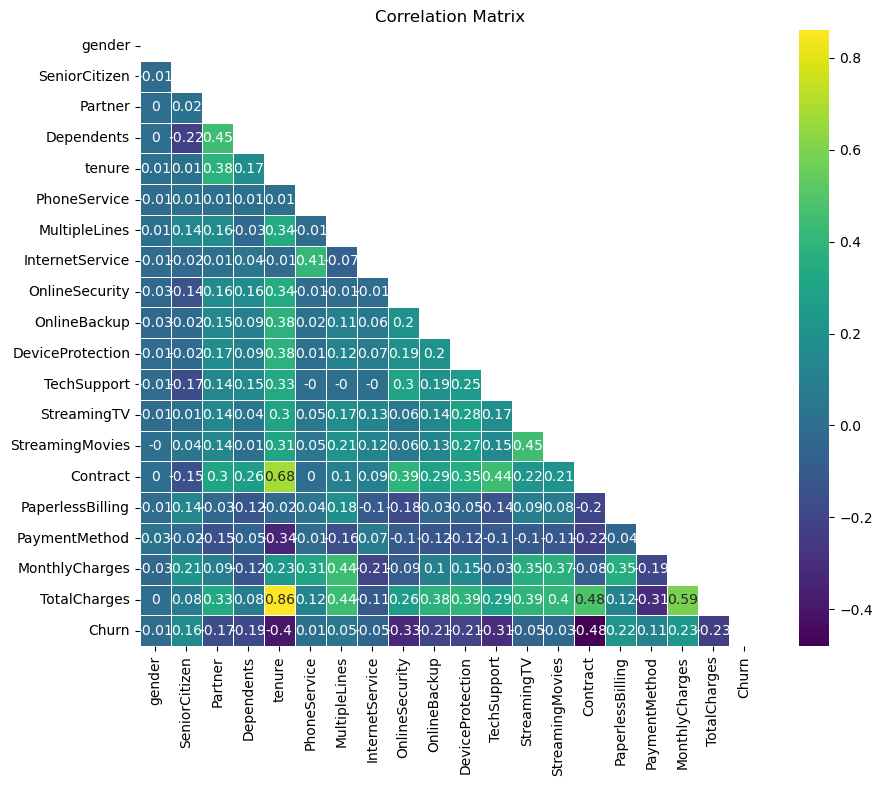

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
correlation_matrix = df_over.corr()

# Rounding values to two decimal places
correlation_matrix = correlation_matrix.round(2)

# Masking upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

We can see that tenure, monthly_charges, total_charges, contract columns are highly corelated.

In [31]:
df_over.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,26,1,0,2,1,1,1,1,1,1,0,0,3,20.90,518.30,0
1,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.90,19.90,0
2,1,1,1,0,18,1,0,1,0,0,0,0,0,2,0,0,2,78.55,1422.65,1
3,0,1,0,0,15,1,0,1,0,2,0,0,0,0,0,1,1,75.30,1147.45,1
4,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,1,3,20.45,42.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,1,0,0,0,11,0,1,0,0,0,2,0,2,0,1,1,2,41.60,470.60,1
9322,1,0,0,0,5,1,0,1,0,0,0,0,0,0,0,1,2,69.70,316.90,1
9323,1,0,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.55,79.55,1
9324,1,1,1,0,66,1,2,1,0,0,0,2,2,2,0,1,1,100.05,6871.90,1


In [41]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9326 entries, 0 to 9325
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            9326 non-null   int32  
 1   SeniorCitizen     9326 non-null   int64  
 2   Partner           9326 non-null   int32  
 3   Dependents        9326 non-null   int32  
 4   tenure            9326 non-null   int64  
 5   PhoneService      9326 non-null   int32  
 6   MultipleLines     9326 non-null   int32  
 7   InternetService   9326 non-null   int32  
 8   OnlineSecurity    9326 non-null   int32  
 9   OnlineBackup      9326 non-null   int32  
 10  DeviceProtection  9326 non-null   int32  
 11  TechSupport       9326 non-null   int32  
 12  StreamingTV       9326 non-null   int32  
 13  StreamingMovies   9326 non-null   int32  
 14  Contract          9326 non-null   int32  
 15  PaperlessBilling  9326 non-null   int32  
 16  PaymentMethod     9326 non-null   int32  


## Question 3 : Modeling (20 pt)

Train at least three different classifier models (e.g., XGBoost, Random Forest, Decision Tree Classifier etc.) and optimize hyperparameters(Hint : GridsearchCV) to enhance performance.

Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report F1 score, Cross-validation score, Precision, Recall, Accuracy). Also, for each model, plot the ROC-AUC curve.

Then, combine your classifiers into an ensemble that outperforms each individual classifier. Describe and discuss your findings.


## Trying different combinations of models to see the performance

Using XGBoast, Random Forest, Decision Tree

Best parameters for XGBoost:
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Cross-validation scores for XGBoost:
F1 score: 0.8656387629248599
Precision: 0.8231866935546307
Recall: 0.9127939268771279
Accuracy: 0.8581510622942741
Balanced Accuracy: 0.9559296590177997
ROC-AUC: 0.9186658024080238
Best parameters for Random Forest:
{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Cross-validation scores for Random Forest:
F1 score: 0.8112629022641196
Precision: 0.7702096161028738
Recall: 0.8570961593398616
Accuracy: 0.8003961674088937
Balanced Accuracy: 0.8125670169418829
ROC-AUC: 0.8711853256576616
Best parameters for Decision Tree:
{'max_depth': 7, 'min_samples_split': 2}
Cross-validation scores for Decision Tree:
F1 score: 0.7871342582280955
Precision: 0.7411382725955737
Recall: 0.8396612201507041
Accuracy: 0.7726703161946336
Balanced Accuracy: 0.7926227750375294
ROC-AUC: 0.8407223475231094


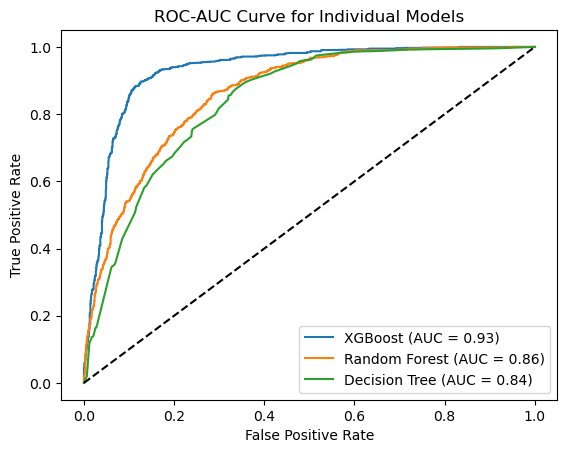

Ensemble model scores:
F1 score: 0.8271766548841549
Precision: 0.7794475811994991
Recall: 0.8812715718092455
Accuracy: 0.8157157358023388
Balanced Accuracy: 0.8156357859046228


In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import train_test_split

X = df_over.drop('Churn', axis=1)
y = df_over['Churn']

# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and hyperparameters to tune
models = {
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Define the evaluation metrics
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']

# Create a StratifiedKFold object for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the best estimators
best_estimators = {}

# Iterate over the models
for name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, scoring=scoring, cv=cv, refit='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best estimator for each model
    best_estimators[name] = grid_search.best_estimator_

    # Print the best hyperparameters and scores
    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Cross-validation scores for {name}:")
    print(f"F1 score: {grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]}")
    print(f"Precision: {grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]}")
    print(f"Recall: {grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]}")
    print(f"Accuracy: {grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y, grid_search.best_estimator_.predict(X))}")
    print(f"ROC-AUC: {grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]}")

    # Plot the ROC-AUC curve for individual models
    model = grid_search.best_estimator_
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
#     bc = balanced_accuracy_score(y_test, y_pred_proba)
#     print('Balanced Accuracy: '+bc)
    
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Individual Models')
plt.legend()
plt.show()

# Create an ensemble model
estimators = [('xgb', best_estimators['XGBoost']),
              ('rf', best_estimators['Random Forest']),
              ('dt', best_estimators['Decision Tree'])]

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
scoring = ['f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy']
cv_results = cross_validate(ensemble, X_train, y_train, scoring=scoring, cv=cv, return_train_score=False)

print("Ensemble model scores:")
print(f"F1 score: {cv_results['test_f1'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Balanced Accuracy: {cv_results['test_balanced_accuracy'].mean()}")


### Adding Naive Bayes, SVM and KNN to the classifier pipeline

Best parameters for XGBoost:
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Cross-validation scores for XGBoost:
F1 score: 0.8653559747151863
Precision: 0.8229252081181073
Recall: 0.9124881164795744
Accuracy: 0.8578449009288107
Balanced Accuracy: 0.9947871533592149
ROC-AUC: 0.9186391780644886
Best parameters for Random Forest:
{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 300}
Cross-validation scores for Random Forest:
F1 score: 0.8109542205284553
Precision: 0.7693839043802275
Recall: 0.8573996281570357
Accuracy: 0.7999362799457852
Balanced Accuracy: 0.8271346614503158
ROC-AUC: 0.8716167797994763
Best parameters for Decision Tree:
{'max_depth': 7, 'min_samples_split': 2}
Cross-validation scores for Decision Tree:
F1 score: 0.7869276299474218
Precision: 0.7419837943490759
Recall: 0.8381316998468608
Accuracy: 0.7728236902477807
Balanced Accuracy: 0.8058287840445743
ROC-AUC: 0.8414307097060056
Best parameters for Logistic Regression:
{'C': 1, 'penalty': 'l2'}
Cross

C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

Best parameters for Naive Bayes:
{}
Cross-validation scores for Naive Bayes:
F1 score: 0.7626541527627608
Precision: 0.7336310326885875
Recall: 0.7943567912855745
Accuracy: 0.7525994379022842
Balanced Accuracy: 0.754237784502632
ROC-AUC: 0.8247391357350364
Best parameters for SVM:
{'C': 10, 'kernel': 'rbf'}
Cross-validation scores for SVM:
F1 score: 0.8098933983222224
Precision: 0.7636142677454829
Recall: 0.8626110494494943
Accuracy: 0.7971815317456128
Balanced Accuracy: 0.8861300508368939
ROC-AUC: 0.8620182158864133
Best parameters for KNN:
{'n_neighbors': 7, 'weights': 'distance'}
Cross-validation scores for KNN:
F1 score: 0.8201329312690758
Precision: 0.7387421747829853
Recall: 0.9219762001770235
Accuracy: 0.7974895706817342
Balanced Accuracy: 0.9984670085829497
ROC-AUC: 0.9196122670425606


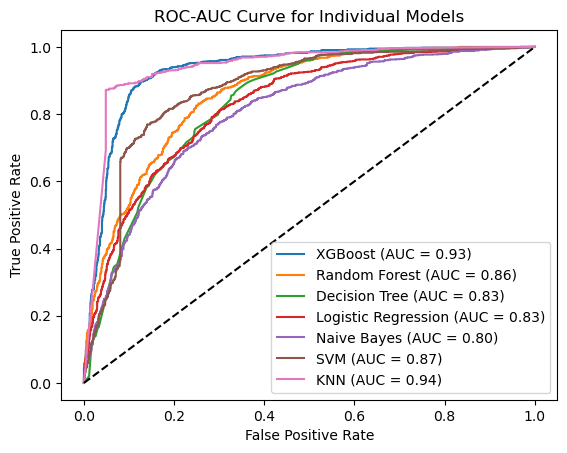

Ensemble model scores:
F1 score: 0.820676904872451
Precision: 0.7682755784967478
Recall: 0.8809676346759956
Accuracy: 0.8072902548215428
Balanced Accuracy: 0.8072016087490408


In [43]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X = df_over.drop('Churn', axis=1)
y = df_over['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and hyperparameters to tune
models = {
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    # Update the 'SVM' model parameters to include 'probability=True'
'SVM': {
    'model': SVC(probability=True),  # Set probability to True
    'params': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
},
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
}

# Define the evaluation metrics
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']

# Create a StratifiedKFold object for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the best estimators
best_estimators = {}

# Iterate over the models
for name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, scoring=scoring, cv=cv, refit='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best estimator for each model
    best_estimators[name] = grid_search.best_estimator_

    # Print the best hyperparameters and scores
    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Cross-validation scores for {name}:")
    print(f"F1 score: {grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]}")
    print(f"Precision: {grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]}")
    print(f"Recall: {grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]}")
    print(f"Accuracy: {grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))}")
    print(f"ROC-AUC: {grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]}")

    # Plot the ROC-AUC curve for individual models
    model = grid_search.best_estimator_
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Individual Models')
plt.legend()
plt.show()

# Create an ensemble model
estimators = [('xgb', best_estimators['XGBoost']),
              ('rf', best_estimators['Random Forest']),
              ('dt', best_estimators['Decision Tree']),
              ('lr', best_estimators['Logistic Regression']),
              ('nb', best_estimators['Naive Bayes']),
              ('svm', best_estimators['SVM']),
              ('knn', best_estimators['KNN'])]

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
scoring = ['f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy']
cv_results = cross_validate(ensemble, X_train, y_train, scoring=scoring, cv=cv, return_train_score=False)

print("Ensemble model scores:")
print(f"F1 score: {cv_results['test_f1'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Balanced Accuracy: {cv_results['test_balanced_accuracy'].mean()}")

In [44]:
ensemble

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features='log2',
                                                     n_estimators=300)),
                             ('dt', DecisionTreeClassifier(max_depth=7)),
                             ('lr', LogisticRegression(C=1)),
                             ('nb', GaussianNB()),
                             ('svm', SVC(C=10, probability=True)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=7,
                                                   weights='distance'))])

Optimizing Hyperparameters of these models and checking the performance

Best parameters for XGBoost:
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Cross-validation scores for XGBoost:
F1 score: 0.8653559747151863
Precision: 0.8229252081181073
Recall: 0.9124881164795744
Accuracy: 0.8578449009288107
Balanced Accuracy: 0.9947871533592149
ROC-AUC: 0.9186391780644886
Best parameters for Random Forest:
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
Cross-validation scores for Random Forest:
F1 score: 0.8108590639232055
Precision: 0.7697042070800422
Recall: 0.8567889439940805
Accuracy: 0.7999373360792804
Balanced Accuracy: 0.82606254364689
ROC-AUC: 0.8719139970998306
Best parameters for SVM:
{'C': 10, 'kernel': 'rbf'}
Cross-validation scores for SVM:
F1 score: 0.8098933983222224
Precision: 0.7636142677454829
Recall: 0.8626110494494943
Accuracy: 0.7971815317456128
Balanced Accuracy: 0.8861300508368939
ROC-AUC: 0.8620182158864133
Best parameters for KNN:
{'n_neighbors': 7, 'weights': 'distance'}
Cross-validation scores for KNN:
F1 score

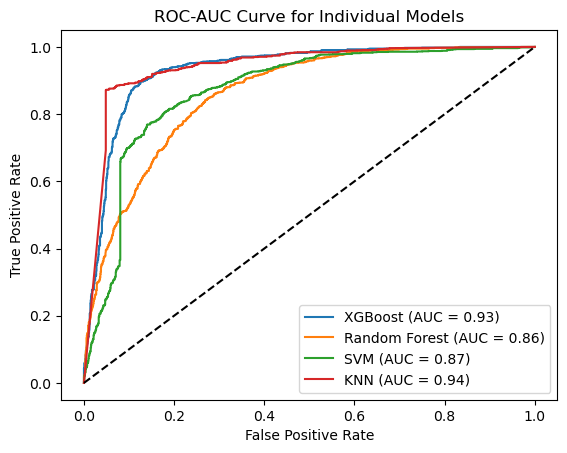

Ensemble model scores:
F1 score: 0.8429124685604528
Precision: 0.8075939169256046
Recall: 0.8815820653675578
Accuracy: 0.8354791618993975
Balanced Accuracy: 0.8354229345242699


In [67]:
# considering only optimal performing models in ensemble
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X = df_over.drop('Churn', axis=1)
y = df_over['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and hyperparameters to tune
models = {
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'max_features': ['sqrt', 'log2']
        }
    },
#     'Decision Tree': {
#         'model': DecisionTreeClassifier(),
#         'params': {
#             'max_depth': [3, 5, 7],
#             'min_samples_split': [2, 5, 10]
#         }
#     },
#     'Logistic Regression': {
#         'model': LogisticRegression(),
#         'params': {
#             'C': [0.1, 1, 10],
#             'penalty': ['l1', 'l2']
#         }
#     },
#     'Naive Bayes': {
#         'model': GaussianNB(),
#         'params': {}
#     },
    # Update the 'SVM' model parameters to include 'probability=True'
'SVM': {
    'model': SVC(probability=True),  # Set probability to True
    'params': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
},
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
}

# Define the evaluation metrics
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']

# Create a StratifiedKFold object for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the best estimators
best_estimators = {}

# Iterate over the models
for name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, scoring=scoring, cv=cv, refit='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best estimator for each model
    best_estimators[name] = grid_search.best_estimator_

    # Print the best hyperparameters and scores
    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Cross-validation scores for {name}:")
    print(f"F1 score: {grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]}")
    print(f"Precision: {grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]}")
    print(f"Recall: {grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]}")
    print(f"Accuracy: {grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))}")
    print(f"ROC-AUC: {grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]}")

    # Plot the ROC-AUC curve for individual models
    model = grid_search.best_estimator_
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Individual Models')
plt.legend()
plt.show()

# Create an ensemble model
estimators = [('xgb', best_estimators['XGBoost']),
              ('rf', best_estimators['Random Forest']),
#               ('dt', best_estimators['Decision Tree']),
#               ('lr', best_estimators['Logistic Regression']),
#               ('nb', best_estimators['Naive Bayes']),
              ('svm', best_estimators['SVM']),
              ('knn', best_estimators['KNN'])]

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
scoring = ['f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy']
cv_results = cross_validate(ensemble, X_train, y_train, scoring=scoring, cv=cv, return_train_score=False)

print("Ensemble model scores:")
print(f"F1 score: {cv_results['test_f1'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Balanced Accuracy: {cv_results['test_balanced_accuracy'].mean()}")

In [68]:
# Generate predictions for the test data
predictions = ensemble.predict(X_test)
# Evaluate the best model on the test set
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
print('balanced_accuracy:',balanced_accuracy)
# print(f'Test RMSE for the best model ({best_model}): {test_rmse}')

balanced_accuracy: 0.841461078027882


### Final Model comprising of XGBoast, Random Forest, Decision Tree, SVM, Logistic Regression, Naive Bayes and KNN

Best parameters for XGBoost:
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
Cross-validation scores for XGBoost:
F1 score: 0.8666572440487512
Precision: 0.826554654010614
Recall: 0.910958127859655
Accuracy: 0.8596823385142548
Balanced Accuracy: 0.9976997619601866
ROC-AUC: 0.9222969923793481
Best parameters for Random Forest:
{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 300}
Cross-validation scores for Random Forest:
F1 score: 0.8040027672136777
Precision: 0.7601113244890324
Recall: 0.8534269028852954
Accuracy: 0.7916653464997976
Balanced Accuracy: 0.8173247178439751
ROC-AUC: 0.86875799531184
Best parameters for Decision Tree:
{'max_depth': 7, 'min_samples_split': 2}
Cross-validation scores for Decision Tree:
F1 score: 0.7797938904221943
Precision: 0.747147577920274
Recall: 0.816102579953262
Accuracy: 0.7692987860332214
Balanced Accuracy: 0.8030909507325168
ROC-AUC: 0.8425643247932306


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

Best parameters for Logistic Regression:
{'C': 1, 'penalty': 'l2'}
Cross-validation scores for Logistic Regression:
F1 score: 0.7704904017870564
Precision: 0.7413388351110946
Recall: 0.8023233160524701
Accuracy: 0.760720400391943
Balanced Accuracy: 0.7591420053915643
ROC-AUC: 0.8390568467623541
Best parameters for Naive Bayes:
{}
Cross-validation scores for Naive Bayes:
F1 score: 0.758359029574552
Precision: 0.7321892257105335
Recall: 0.7867096580824329
Accuracy: 0.749077232695546
Balanced Accuracy: 0.7485745770475554
ROC-AUC: 0.8200514067396083
Best parameters for SVM:
{'C': 10, 'kernel': 'rbf'}
Cross-validation scores for SVM:
F1 score: 0.8079376410145975
Precision: 0.7639579427074203
Recall: 0.857714336560031
Accuracy: 0.7958022214007852
Balanced Accuracy: 0.8800048433968357
ROC-AUC: 0.8586356952868985
Best parameters for KNN:
{'n_neighbors': 9, 'weights': 'distance'}
Cross-validation scores for KNN:
F1 score: 0.8175131353234638
Precision: 0.7321759080243609
Recall: 0.92564920316019

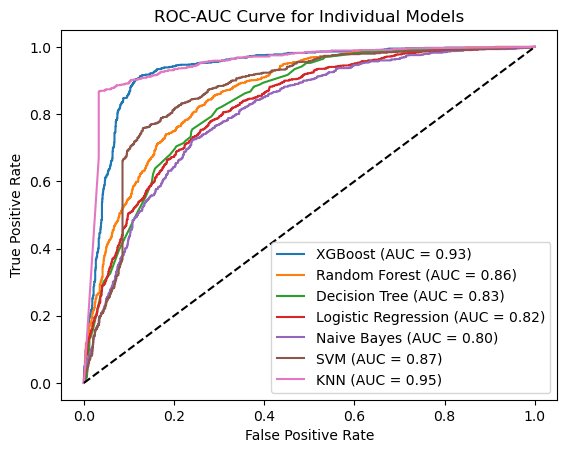

Ensemble model scores:
F1 score: 0.817179175006552
Precision: 0.7666145575064798
Recall: 0.8751525539617198
Accuracy: 0.8039188420082966
Balanced Accuracy: 0.8038339456925165


In [109]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



X = df_over.drop('Churn', axis=1)
y = df_over['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and hyperparameters to tune
models = {
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    # Update the 'SVM' model parameters to include 'probability=True'
'SVM': {
    'model': SVC(probability=True),  # Set probability to True
    'params': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
},
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
}

# Define the evaluation metrics
scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']

# Create a StratifiedKFold object for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store the best estimators
best_estimators = {}

# Iterate over the models
for name, model_params in models.items():
    model = model_params['model']
    params = model_params['params']

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, scoring=scoring, cv=cv, refit='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best estimator for each model
    best_estimators[name] = grid_search.best_estimator_

    # Print the best hyperparameters and scores
    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print(f"Cross-validation scores for {name}:")
    print(f"F1 score: {grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]}")
    print(f"Precision: {grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]}")
    print(f"Recall: {grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]}")
    print(f"Accuracy: {grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))}")
    print(f"ROC-AUC: {grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]}")

    # Plot the ROC-AUC curve for individual models
    model = grid_search.best_estimator_
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Individual Models')
plt.legend()
plt.show()

# Create an ensemble model
estimators = [('xgb', best_estimators['XGBoost']),
              ('rf', best_estimators['Random Forest']),
              ('dt', best_estimators['Decision Tree']),
              ('lr', best_estimators['Logistic Regression']),
              ('nb', best_estimators['Naive Bayes']),
              ('svm', best_estimators['SVM']),
              ('knn', best_estimators['KNN'])]

ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
scoring = ['f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy']
cv_results = cross_validate(ensemble, X_train, y_train, scoring=scoring, cv=cv, return_train_score=False)

print("Ensemble model scores:")
print(f"F1 score: {cv_results['test_f1'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Balanced Accuracy: {cv_results['test_balanced_accuracy'].mean()}")

## Question 4 : Evaluation and Reporting(20 pt)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


### After evaluating the results on the unseen data (X_test), it's evident that the XGBoost and KNN models have demonstrated excellent performance in the ensemble. Therefore, we have decided to utilize these models for making predictions on the test.csv dataset.

In [45]:
# Generate predictions for the test data
predictions = ensemble.predict(X_test)

In [110]:
# Evaluate the best model on the test set
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
print('balanced_accuracy:',balanced_accuracy)
# print(f'Test RMSE for the best model ({best_model}): {test_rmse}')

balanced_accuracy: 0.8072098447515181


## Question 5 : External validation (30 pt)

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [113]:
tel_com_test=pd.read_csv('test_problem1_UAI.csv')

In [114]:
tel_com_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
1,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
2,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
3,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
4,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4568-KNYWR,Male,0,No,No,52,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit card (automatic),63.25,3342.45
701,9658-WYUFB,Female,0,No,No,17,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.40,1617.50
702,0997-YTLNY,Female,0,No,Yes,19,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,48.80,953.65
703,3208-YPIOE,Male,0,No,No,39,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,3017.65


### Performing Pre-processing on test.csv

In [115]:
tel_com_test=pd.read_csv('test_problem1_UAI.csv')
continuous_attributes = tel_com_test.select_dtypes(include=['number']).columns.tolist()
categorical_attributes = tel_com_test.select_dtypes(include=['object']).columns.tolist()
# tel_com_test.dropna(inplace=True)
total_charges_mean = tel_com_test['TotalCharges'].replace(' ', np.nan).dropna().astype(float).mean()
tel_com_test['TotalCharges'] = tel_com_test['TotalCharges'].replace(' ', total_charges_mean).astype(float)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in tel_com_test.columns:
    if tel_com_test[col].dtype == 'object':
        tel_com_test[col] = label_encoder.fit_transform(tel_com_test[col])

tel_com_test = tel_com_test.drop(columns=['customerID'])  
tel_com_test = tel_com_test.drop(columns=['tenure'])  


In [116]:
tel_com_test = tel_com_test.drop(columns=['tenure'])  

In [117]:
tel_com_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80
1,1,0,0,0,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45
2,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
3,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35
4,1,0,0,0,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1,0,0,0,1,0,0,2,2,0,0,2,0,2,1,1,63.25,3342.45
701,0,0,0,0,1,2,1,2,2,0,0,2,0,0,1,2,94.40,1617.50
702,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,3,48.80,953.65
703,1,0,0,0,1,2,1,0,0,0,0,0,0,0,0,2,75.25,3017.65


In [118]:
tel_com_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            705 non-null    int32  
 1   SeniorCitizen     705 non-null    int64  
 2   Partner           705 non-null    int32  
 3   Dependents        705 non-null    int32  
 4   PhoneService      705 non-null    int32  
 5   MultipleLines     705 non-null    int32  
 6   InternetService   705 non-null    int32  
 7   OnlineSecurity    705 non-null    int32  
 8   OnlineBackup      705 non-null    int32  
 9   DeviceProtection  705 non-null    int32  
 10  TechSupport       705 non-null    int32  
 11  StreamingTV       705 non-null    int32  
 12  StreamingMovies   705 non-null    int32  
 13  Contract          705 non-null    int32  
 14  PaperlessBilling  705 non-null    int32  
 15  PaymentMethod     705 non-null    int32  
 16  MonthlyCharges    705 non-null    float64
 1

Scaling the test data before fitting it in the model

In [119]:
tel_com_test = scaler.transform(tel_com_test)

In [120]:
tel_com_test

array([[-1.00830656, -0.4921844 ,  1.12441452, ...,  0.36538329,
        -1.49569068, -0.9281251 ],
       [ 0.99176187, -0.4921844 , -0.88935173, ..., -1.60018912,
        -1.48007627, -0.48423313],
       [-1.00830656, -0.4921844 ,  1.12441452, ...,  1.3481695 ,
        -1.68479856, -0.4681294 ],
       ...,
       [-1.00830656, -0.4921844 , -0.88935173, ...,  1.3481695 ,
        -0.66292204, -0.50378603],
       [ 0.99176187, -0.4921844 , -0.88935173, ...,  0.36538329,
         0.25485839,  0.43913891],
       [ 0.99176187, -0.4921844 , -0.88935173, ...,  1.3481695 ,
        -0.20836916,  0.26985556]])

Predicting the labels for the test.csv file

In [121]:
# Predict the labels for the test data
y_pred = ensemble.predict(tel_com_test)
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Churn': y_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


Since we previously applied label encoding, it's necessary to map our predicted class labels back to their original values.

In [122]:
# Define the mapping dictionary
mapping = {'Yes': 1, 
           'No': 0, 
          }

# Load the predictions CSV file
df_predictions = pd.read_csv('predictions_new_problem1_emsemble_no_tenure.csv')

# Reverse the mapping dictionary
reverse_mapping = {v: k for k, v in mapping.items()}

# Map the numerical values back to their original labels
df_predictions['Churn'] = df_predictions['Churn'].map(reverse_mapping)


mapped_values_df = df_predictions[df_predictions['Churn'].isin(mapping.keys())]

# Save the selected column to a new CSV file
mapped_values_df['Churn'].to_csv('problem1_rev_mapped.csv', index=False, header=['Churn'])

## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [52]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    return balanced_accuracy
    

In [48]:
# balanced_accuracy=evaluation_metrics(y_test, y_prob)